----

<div align="center">
    

 
 # Welcome to the teaspoon (topological signal processing) demo!
    
<br />
 
 <img src="figures/teaspoon.png" style="width:300px;">
</div>


---

## 1. Getting Started

### 1.1 Documentation

Source code:    https://github.com/lizliz/teaspoon

Documentation:  http://elizabethmunch.com/code/teaspoon/index.html

### 1.2 Installing teaspoon

```
pip install teaspoon
```

Pypi: https://pypi.org/project/teaspoon/





----

----

## 2. [Dynamical Systems Library Module](http://elizabethmunch.com/code/teaspoon/DynSysLib.html)
<br />
<div align="center"> 
 <img src="figures/DSL_fig.png" style="width:300px;">
</div>


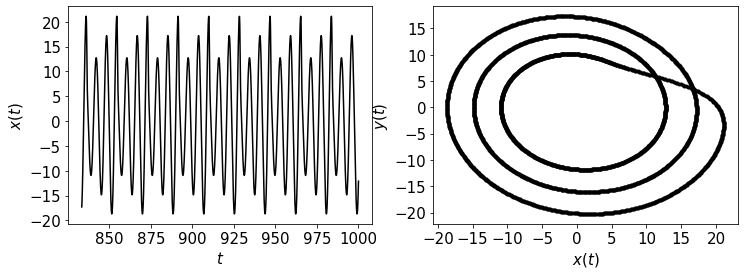

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

system = 'rossler'
dynamic_state = 'periodic'
t, ts = DSL.DynamicSystems(system, dynamic_state)

TextSize = 15
plt.figure(figsize = (12,4))
gs = gridspec.GridSpec(1,2)

ax = plt.subplot(gs[0, 0])
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$x(t)$', size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.plot(t,ts[0], 'k')

ax = plt.subplot(gs[0, 1])
plt.plot(ts[0], ts[1],'k.')
plt.plot(ts[0], ts[1],'k', alpha = 0.25)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$y(t)$', size = TextSize)

plt.show()

Result


----------------------------------------User Guide----------------------------------------------

This code outputs a time array t and a list time series for each variable of the dynamic system.
The user is only required to enter the system (see list below) as a string and 
the dynamic state as either periodic or chaotic as a string.

The user also has the optional inputs as the time series length in seconds (L), 
the sampling rate (fs), and the sample size (SampleSize).
If the user does not supply these values, they are defaulted to preset values.

Other optional inputs are parameters and InitialConditions. The parameters variable
needs to be entered as a list or array and are the dynamic system parameters.
If the correct number of parameters is not provided it will default to preset parameters.
The InitialConditions variable is also a list or array and is the initial conditions of the system.
The length of the initial conditions also need to match the system being analyzed.

List of

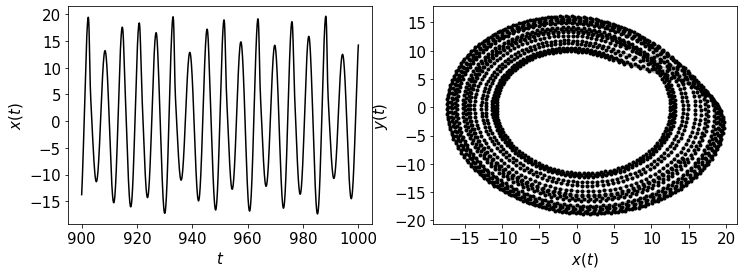

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL

system = 'rossler'
UserGuide = True
L, fs, SampleSize = 1000, 20, 2000
# the length (in seconds) of the time series, the sample rate, and the sample size of the time series of the simulated system.
parameters = [0.1, 0.2, 13.0] # these are the a, b, and c parameters from the Rossler system model.
InitialConditions = [1.0, 0.0, 0.0] # [x_0, y_0, x_0]
t, ts = DSL.DynamicSystems(system, dynamic_state, L, fs, SampleSize, parameters,  InitialConditions, UserGuide)

TextSize = 15
plt.figure(figsize = (12,4))
gs = gridspec.GridSpec(1,2)

ax = plt.subplot(gs[0, 0])
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$x(t)$', size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.plot(t,ts[0], 'k')

ax = plt.subplot(gs[0, 1])
plt.plot(ts[0], ts[1],'k.')
plt.plot(ts[0], ts[1],'k', alpha = 0.25)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$y(t)$', size = TextSize)

plt.show()

result

----

---


## 3. [Parameter Selection Module](http://elizabethmunch.com/code/teaspoon/parameter_selection.html)
<br />
<div align="center"> 
 <img src="figures/PS_fig.png" style="width:300px;">
</div>

### 3.1 Mutual Information

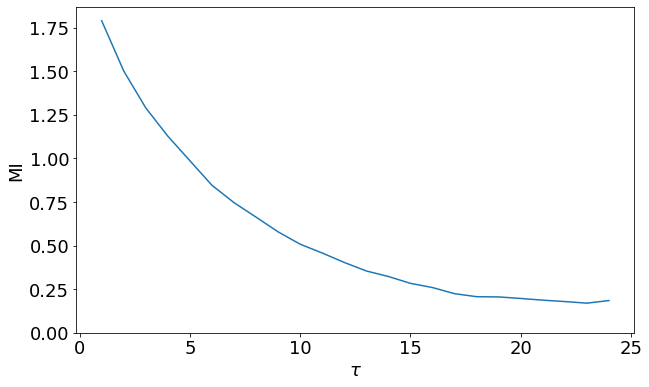

Delay from MI:  23


In [7]:
from teaspoon.parameter_selection.MI_delay import MI_for_delay
import numpy as np

fs = 10
t = np.linspace(0, 100, fs*100)
ts = np.sin(t) + np.sin((1/np.pi)*t)

tau = MI_for_delay(ts, plotting = True, method = 'basic', h_method = 'sturge', k = 2, ranking = True)
print('Delay from MI: ',tau)

### 3.2 False Nearest Neighbors

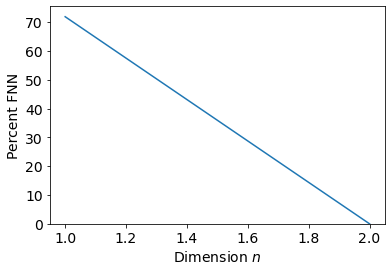

FNN embedding Dimension:  2


In [1]:
from teaspoon.parameter_selection.FNN_n import FNN_n
import numpy as np

fs = 10
t = np.linspace(0, 100, fs*100)
ts = np.sin(t)

tau=15 #embedding delay

perc_FNN, n = FNN_n(ts, tau, plotting = True)
print('FNN embedding Dimension: ',n)

### 3.3 Multi-scale Permutation Entropy

<Figure size 432x288 with 0 Axes>

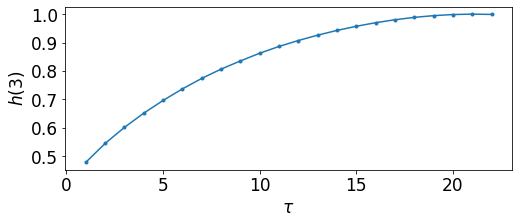

<Figure size 432x288 with 0 Axes>

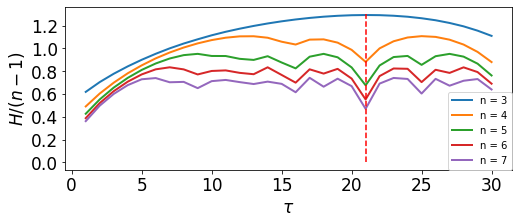

Embedding Delay:       21
Embedding Dimension:   3


In [2]:
import numpy as np
from teaspoon.parameter_selection.MsPE import MsPE_n,  MsPE_tau

t = np.linspace(0, 100, 1000)
ts = np.sin(t)

m_s, m_e, d_s, d_e = 3, 7, 1, 200
#m_s and m_e are the starting and ending dimensions n to search through
#d_e = max delay tau to search through

#plotting option will show you how delay tau or dimension n were selected
tau = int(MsPE_tau(ts, d_e, plotting = True))
n = MsPE_n(ts, tau, m_s, m_e, plotting = True)

print('Embedding Delay:       '+str(tau))
print('Embedding Dimension:   '+str(n))


----
---

## 4. [Information Module](http://elizabethmunch.com/code/teaspoon/information.html)
<br />
<div align="center"> 
 <img src="figures/I_fig.png" style="width:300px;">
</div>

### 4.1 Permutation Entropy

In [3]:
import numpy as np
t = np.linspace(0,100,2000)
ts = np.sin(t)  #generate a simple time series

from teaspoon.SP.information.entropy import PE
h = PE(ts, n = 6, tau = 15, normalize = True)
print('Permutation entropy: ', h)

Permutation entropy:  0.4350397222113192


<Figure size 432x288 with 0 Axes>

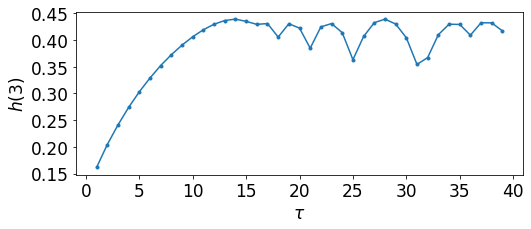

In [4]:
import numpy as np
t = np.linspace(0,100,2000)
ts = np.sin(t)  #generate a simple time series

from teaspoon.SP.information.entropy import MsPE
delays,H = MsPE(ts, n = 6, delay_end = 40, normalize = True)

import matplotlib.pyplot as plt
plt.figure(2)
TextSize = 17
plt.figure(figsize=(8,3))
plt.plot(delays, H, marker = '.')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.ylabel(r'$h(3)$', size = TextSize)
plt.xlabel(r'$\tau$', size = TextSize)
plt.show()

### 4.2 Persistent Entropy

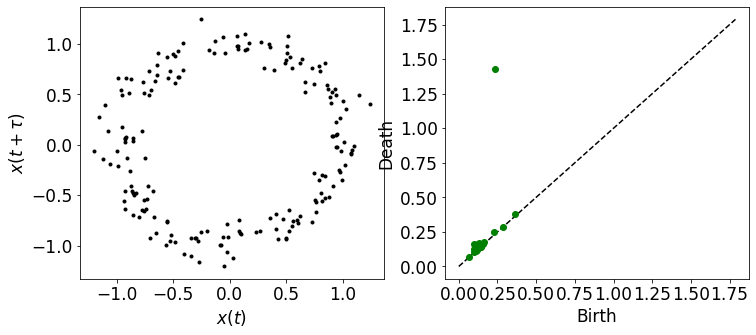

Persistent entropy:  1.371452111366864


In [5]:
import numpy as np
#generate a simple time series with noise
t = np.linspace(0,20,200)
ts = np.sin(t) +np.random.normal(0,0.1,len(t))

from teaspoon.SP.tsa_tools import takens
#embed the time series into 2 dimension space using takens embedding
embedded_ts = takens(ts, n = 2, tau = 15)

from ripser import ripser
#calculate the rips filtration persistent homology
result = ripser(embedded_ts, maxdim=1)
diagram = result['dgms']

#--------------------Plot embedding and persistence diagram---------------
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize = (12,5))
TextSize = 17
MS = 4

ax = plt.subplot(gs[0, 0])
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel(r'$x(t)$', size = TextSize)
plt.ylabel(r'$x(t+\tau)$', size = TextSize)
plt.plot(embedded_ts.T[0], embedded_ts.T[1], 'k.')

ax = plt.subplot(gs[0, 1])
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)

plt.show()
#-------------------------------------------------------------------------

#get lifetimes (L) as difference between birth (B) and death (D) times
B, D = diagram[1].T[0], diagram[1].T[1]
L = D - B

from teaspoon.SP.information.entropy import PersistentEntropy
h = PersistentEntropy(lifetimes = L)

print('Persistent entropy: ', h)

----
---

## 5. [Persistent Homology of Complex Networks Module](http://elizabethmunch.com/code/teaspoon/PHN.html)
<br />
<div align="center"> 
 <img src="figures/CN_fig.png" style="width:300px;">
</div>

### [Persistent Homology of Ordinal Partition Networks](http://elizabethmunch.com/code/teaspoon/network.html)

### Periodic Example

1-D Persistent Homology (loops):  [[1. 9.]
 [1. 2.]
 [1. 5.]]
Persistent homology of network statistics:  [0.7692307692307692, 0.3347983891019821, 0.025]


<Figure size 432x288 with 0 Axes>

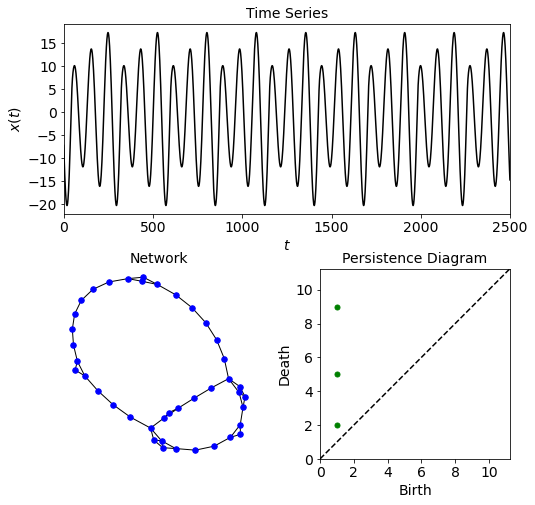

In [28]:
#import needed packages
import numpy as np
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau


#generate time series
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
system = 'rossler'
dynamic_state = 'periodic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]


#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

### Chaotic Example

1-D Persistent Homology (loops):  [[1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 3.]
 [1. 3.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 2.]
 [1. 2.]]


<Figure size 432x288 with 0 Axes>

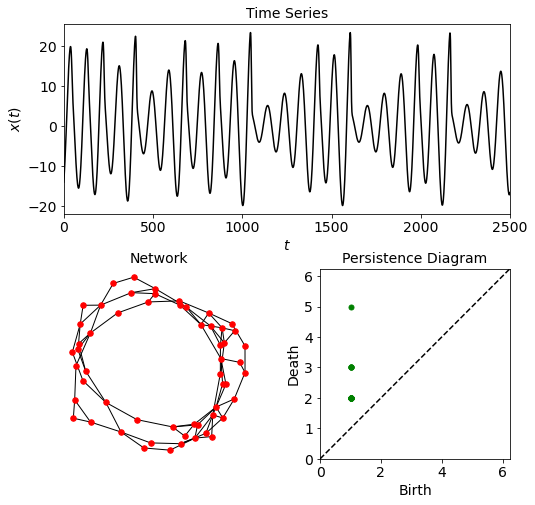

In [30]:
#import needed packages
import numpy as np
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau


#generate time series
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
system = 'rossler'
dynamic_state = 'chaotic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[0]


#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts, n, tau)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 1000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='red',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

### [Persistent Homology of k-NN Networks](http://elizabethmunch.com/code/teaspoon/network.html)

1-D Persistent Homology (loops):  [[ 1. 47.]]
Persistent homology of network statistics:  [0.4946236559139785, 0, 0.0035460992907801418]


<Figure size 432x288 with 0 Axes>

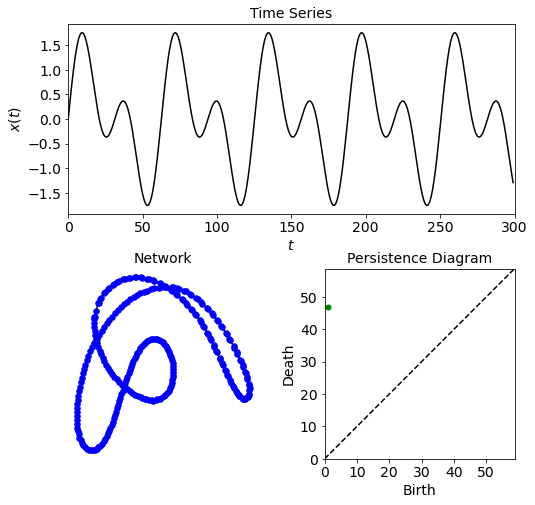

In [15]:
#import needed packages
import numpy as np
from teaspoon.SP.network import knn_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau

#generate a siple sinusoidal time series
t = np.linspace(0,30,300)
ts = np.sin(t) + np.sin(2*t)

#Get appropriate dimension and delay parameters for permutations
tau = int(MsPE_tau(ts))
n = 3

#create adjacency matrix, this
A = knn_graph(ts, n, tau, k = 4)

#get networkx representation of network for plotting
G, pos = make_network(A, position_iterations = 1000, remove_deg_zero_nodes = True)

#create distance matrix and calculate persistence diagram
D, diagram = PH_network(A, method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology (loops): ', diagram[1])

stats = point_summaries(diagram, A)
print('Persistent homology of network statistics: ', stats)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx

TextSize = 14
plt.figure(2)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(4, 2)

ax = plt.subplot(gs[0:2, 0:2]) #plot time series
plt.title('Time Series', size = TextSize)
plt.plot(ts, 'k')
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel('$t$', size = TextSize)
plt.ylabel('$x(t)$', size = TextSize)
plt.xlim(0,len(ts))

ax = plt.subplot(gs[2:4, 0])
plt.title('Network', size = TextSize)
nx.draw(G, pos, with_labels=False, font_weight='bold', node_color='blue',
        width=1, font_size = 10, node_size = 30)

ax = plt.subplot(gs[2:4, 1])
plt.title('Persistence Diagram', size = TextSize)
MS = 3
top = max(diagram[1].T[1])
plt.plot([0,top*1.25],[0,top*1.25],'k--')
plt.yticks( size = TextSize)
plt.xticks(size = TextSize)
plt.xlabel('Birth', size = TextSize)
plt.ylabel('Death', size = TextSize)
plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
plt.xlim(0,top*1.25)
plt.ylim(0,top*1.25)

plt.subplots_adjust(hspace= 0.8)
plt.subplots_adjust(wspace= 0.35)
plt.show()

----
---

## 5. [Machine Learning Module](http://elizabethmunch.com/code/teaspoon/ML.html)
<br />
<div align="center"> 
 <img src="figures/ML_fig.png" style="width:300px;">
</div>

## 6. [Some New Module](http://elizabethmunch.com/code/teaspoon/modules.html)

In [10]:
import warnings
warnings.filterwarnings('ignore')